In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from seaborn import scatterplot
from sklearn import metrics

In [2]:
df=pd.read_csv("DIABETES.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,0
1,1,85,66,29,0,26.6,0.351,31,1
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.shape

(752, 9)

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000
mean,3.840426,120.757979,68.936170,20.694149,78.285904,31.967420,0.474126,33.144947,0.388298
std,3.367197,31.981851,19.459984,16.057804,109.797814,7.921048,0.336583,11.701867,0.487687
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.300000,0.240000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.375500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.250000,128.250000,36.600000,0.627500,40.250000,1.000000
max,17.000000,199.000000,122.000000,99.000000,744.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129533,0.136199,-0.084487,-0.069968,0.020713,-0.020000,0.546898,0.210498
Glucose,0.129533,1.000000,0.145517,0.052217,0.297982,0.214118,0.137618,0.258957,0.411977
BloodPressure,0.136199,0.145517,1.000000,0.188568,0.097372,0.277114,0.070720,0.238006,0.052564
SkinThickness,-0.084487,0.052217,0.188568,1.000000,0.411760,0.370842,0.188243,-0.120436,0.061774
Insulin,-0.069968,0.297982,0.097372,0.411760,1.000000,0.203426,0.197026,-0.086556,0.079215
BMI,0.020713,0.214118,0.277114,0.370842,0.203426,1.000000,0.137174,0.032532,0.229917
DiabetesPedigreeFunction,-0.020000,0.137618,0.070720,0.188243,0.197026,0.137174,1.000000,0.046558,0.156391
Age,0.546898,0.258957,0.238006,-0.120436,-0.086556,0.032532,0.046558,1.000000,0.227651
Outcome,0.210498,0.411977,0.052564,0.061774,0.079215,0.229917,0.156391,0.227651,1.000000


#### The target variable outcome is highly corelated with Glucose i.e 41 %

<AxesSubplot:>

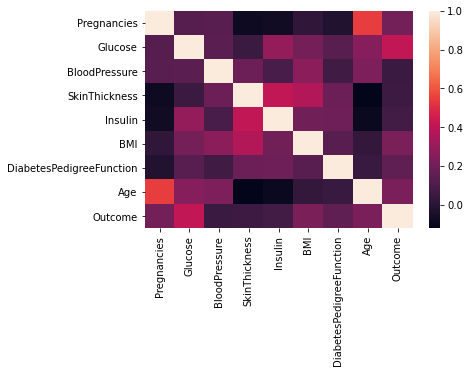

In [8]:
sns.heatmap(df.corr())

<AxesSubplot:xlabel='Outcome', ylabel='count'>

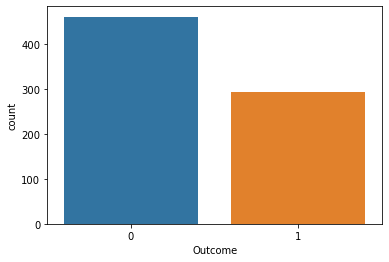

In [87]:
sns.countplot(x='Outcome',data=df)

In [9]:
#checking class imbalance
df['Outcome'].value_counts()

0    460
1    292
Name: Outcome, dtype: int64

In [10]:
class_imbalance=460/(460+292)
class_imbalance

0.6117021276595744

### Modelling

In [84]:
x = df.drop('Outcome',axis=1)
y = df['Outcome']

x1=x.values.reshape(-1,1)
y1=y.values.reshape(-1,1)

In [85]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y1,test_size=0.3,random_state=101)

In [86]:
print("Shape of x_train: ",x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of x_train:  (526, 8)
Shape of x_test:  (226, 8)
Shape of y_train:  (526, 1)
Shape of y_test (226, 1)


### Logistic Regression

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [17]:
sc

StandardScaler(copy=True, with_mean=True, with_std=True)

In [18]:
# create the object of the model
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()

model1.fit(x_train_std,y_train)

C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
pred1 = model1.predict(x_test_std)

In [20]:
from sklearn.metrics import accuracy_score

print('Predicted Values on Test Data',(pred1))

print('Logistic Regression Train Score: ',model1.score(x_train_std, y_train))
print('Logistic Regression Test Score: ',model1.score(x_test_std, y_test))

Predicted Values on Test Data [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 1
 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1
 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1
 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1
 0 0 1 0]
Logistic Regression Train Score:  0.7186311787072244
Logistic Regression Test Score:  0.7433628318584071


Confusion Matrix 
A confusion matrix is an N X N matrix, where N is the number of classes being predicted. 
Confusion Matrix gives us a matrix as output and describes the complete performance of the model.

The correct predictions falls on the diagonal line of the matrix.

4 important terms in Confusion Matrix:

True Positives : The cases in which we predicted YES and the actual output was also YES.

False Negatives(Type 2 error) : The cases in which we predicted NO and the actual output was YES.

False Positives(Type 1 error) : The cases in which we predicted YES and the actual output was NO.

True Negatives : The cases in which we predicted NO and the actual output was NO.

The Confusion matrix in itself is not a performance measure as such,
but almost all of the performance metrics are based on Confusion Matrix and the numbers inside it.

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,pred1)
print(confusion_matrix)

[[125  24]
 [ 34  43]]


In [22]:
from sklearn.metrics import confusion_matrix
import numpy as np 
cm=np.array(confusion_matrix(y_test,pred1))
df_confusion=pd.DataFrame(cm,index=["Positive","Negative"], columns=["Positive","Negative"])
print(df_confusion)
print('Accuracy through Logistic regression :',accuracy_score(y_test,pred1))

          Positive  Negative
Positive       125        24
Negative        34        43
Accuracy through Logistic regression : 0.7433628318584071


In [23]:
from sklearn.metrics import classification_report

In [24]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       149
           1       0.64      0.56      0.60        77

    accuracy                           0.74       226
   macro avg       0.71      0.70      0.70       226
weighted avg       0.74      0.74      0.74       226



## Support vector Machine  when kernel is random = rbf

In [25]:
from sklearn import svm

#create a classifier
Model2 = svm.SVC()

#train the model
Model2.fit(x_train,y_train)

C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [26]:
#predict the response
pred2 = Model2.predict(x_test)

In [27]:
from sklearn import metrics
print('Predicted Values on Test Data',(pred2))

print('SVM Train Score with RBF kernel: ',Model2.score(x_train, y_train))
print('SVM Test Score with RBF kernel: ',Model2.score(x_test, y_test))

from sklearn.metrics import accuracy_score
#accuracy
print("Model Accuracy through SVM:", metrics.accuracy_score(y_test,y_pred=pred2))

Predicted Values on Test Data [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 1
 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0
 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1
 0 0 1 0]
SVM Train Score with RBF kernel:  0.7224334600760456
SVM Test Score with RBF kernel:  0.7168141592920354
Model Accuracy through SVM: 0.7168141592920354


In [28]:
from sklearn.metrics import confusion_matrix
import numpy as np 
cm=np.array(confusion_matrix(y_test,pred2))
df_confusion=pd.DataFrame(cm,index=["Positive","Negative"], columns=["Positive","Negative"])
print(df_confusion)
print('Accuracy through SVM RBF :',accuracy_score(y_test,pred2))

          Positive  Negative
Positive       126        23
Negative        41        36
Accuracy through SVM RBF : 0.7168141592920354


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80       149
           1       0.61      0.47      0.53        77

    accuracy                           0.72       226
   macro avg       0.68      0.66      0.66       226
weighted avg       0.71      0.72      0.71       226



### Support vector machine with kernel linear

In [30]:
from sklearn import svm

#create a classifier
Model3 = svm.SVC(kernel="linear")

#train the model
Model3.fit(x_train,y_train)

C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
#predict the response
pred3 = Model3.predict(x_test)

In [32]:
from sklearn import metrics
print('Predicted Values on Test Data',(pred3))

print('SVM Train Score with linear kernel : ',Model3.score(x_train, y_train))
print('SVM Regression Test Score with linear kernel: ',Model3.score(x_test, y_test))

from sklearn.metrics import accuracy_score
#accuracy
print("Model Accuracy through SVM with linear kernel:", metrics.accuracy_score(y_test,y_pred=pred3))

Predicted Values on Test Data [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 1
 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1
 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1
 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1
 0 0 1 0]
SVM Train Score with linear kernel :  0.7167300380228137
SVM Regression Test Score with linear kernel:  0.7345132743362832
Model Accuracy through SVM with linear kernel: 0.7345132743362832


In [33]:
from sklearn.metrics import confusion_matrix
import numpy as np 
cm=np.array(confusion_matrix(y_test,pred3))
df_confusion=pd.DataFrame(cm,index=["Positive","Negative"], columns=["Positive","Negative"])
print(df_confusion)
print('Accuracy through SVM Linear :',accuracy_score(y_test,pred3))

          Positive  Negative
Positive       124        25
Negative        35        42
Accuracy through SVM Linear : 0.7345132743362832


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81       149
           1       0.63      0.55      0.58        77

    accuracy                           0.73       226
   macro avg       0.70      0.69      0.69       226
weighted avg       0.73      0.73      0.73       226



#### SVM with poly kernel

In [43]:
from sklearn import svm

#create a classifier
Model4 = svm.SVC(kernel="poly")

#train the model
Model4.fit(x_train,y_train)

C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [44]:
#predict the response
pred4 = Model4.predict(x_test)

In [45]:
from sklearn import metrics
print('Predicted Values on Test Data',(pred4))

print('SVM Train Score with poly kernel : ',Model4.score(x_train, y_train))
print('SVM Test Score with poly kernel: ',Model4.score(x_test, y_test))

from sklearn.metrics import accuracy_score
#accuracy
print("Model Accuracy through SVM with poly kernel:", metrics.accuracy_score(y_test,y_pred=pred4))

Predicted Values on Test Data [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1
 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0
 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1
 0 0 1 0]
SVM Train Score with poly kernel :  0.7167300380228137
SVM Test Score with poly kernel:  0.7345132743362832
Model Accuracy through SVM with poly kernel: 0.7345132743362832


In [46]:
from sklearn.metrics import confusion_matrix
import numpy as np 
cm=np.array(confusion_matrix(y_test,pred4))
df_confusion=pd.DataFrame(cm,index=["Positive","Negative"], columns=["Positive","Negative"])
print(df_confusion)
print('Accuracy through SVM poly :',accuracy_score(y_test,pred4))

          Positive  Negative
Positive       130        19
Negative        41        36
Accuracy through SVM poly : 0.7345132743362832


In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       149
           1       0.65      0.47      0.55        77

    accuracy                           0.73       226
   macro avg       0.71      0.67      0.68       226
weighted avg       0.72      0.73      0.72       226



#### SVM with Hyper Parameter Tunning using Grid Search

In [35]:
X = df.drop('Outcome',axis=1)
Y = df['Outcome']

x1=X.values.reshape(-1,1)
y1=Y.values.reshape(-1,1)


In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y1,test_size=0.3,random_state=101)

In [37]:
print("Shape of x_train: ",x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of x_train:  (526, 8)
Shape of x_test:  (226, 8)
Shape of y_train:  (526, 1)
Shape of y_test (226, 1)


In [38]:
from sklearn.svm import SVC

model5 = SVC() 
model5.fit(x_train, y_train)


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [39]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear', 'rbf']}  
             # ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.698, total=   0.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.695, total=   0.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.743, total=   0.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.676, total=   0.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.686, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.594, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.698, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.695, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=linear .................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.743, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.676, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=linear .................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.686, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.594, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV] .... C=0.1, gamma=0.01, kernel=linear, score=0.698, total=   0.2s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] .... C=0.1, gamma=0.01, kernel=linear, score=0.695, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=linear ................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=0.1, gamma=0.01, kernel=linear, score=0.743, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] .... C=0.1, gamma=0.01, kernel=linear, score=0.676, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=linear ................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=0.1, gamma=0.01, kernel=linear, score=0.686, total=   0.2s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.594, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.590, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.590, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.590, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.590, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.698, total=   0.2s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.695, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.743, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.676, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.686, total=   0.2s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.594, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.610, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=linear ..............................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV] .. C=0.1, gamma=0.0001, kernel=linear, score=0.698, total=   0.2s
[CV] C=0.1, gamma=0.0001, kernel=linear ..............................
[CV] .. C=0.1, gamma=0.0001, kernel=linear, score=0.695, total=   0.1s
[CV] C=0.1, gamma=0.0001, kernel=linear ..............................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. C=0.1, gamma=0.0001, kernel=linear, score=0.743, total=   0.1s
[CV] C=0.1, gamma=0.0001, kernel=linear ..............................
[CV] .. C=0.1, gamma=0.0001, kernel=linear, score=0.676, total=   0.1s
[CV] C=0.1, gamma=0.0001, kernel=linear ..............................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. C=0.1, gamma=0.0001, kernel=linear, score=0.686, total=   0.2s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.670, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.638, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.667, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.657, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.676, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV] ......... C=1, gamma=1, kernel=linear, score=0.698, total=   2.7s
[CV] C=1, gamma=1, kernel=linear .....................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......... C=1, gamma=1, kernel=linear, score=0.686, total=   1.7s
[CV] C=1, gamma=1, kernel=linear .....................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......... C=1, gamma=1, kernel=linear, score=0.743, total=   1.0s
[CV] C=1, gamma=1, kernel=linear .....................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......... C=1, gamma=1, kernel=linear, score=0.667, total=   1.4s
[CV] C=1, gamma=1, kernel=linear .....................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......... C=1, gamma=1, kernel=linear, score=0.695, total=   1.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.594, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.698, total=   2.7s
[CV] C=1, gamma=0.1, kernel=linear ...................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.686, total=   1.7s
[CV] C=1, gamma=0.1, kernel=linear ...................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.743, total=   1.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.667, total=   1.4s
[CV] C=1, gamma=0.1, kernel=linear ...................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.695, total=   1.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.594, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV] ...... C=1, gamma=0.01, kernel=linear, score=0.698, total=   2.6s
[CV] C=1, gamma=0.01, kernel=linear ..................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=1, gamma=0.01, kernel=linear, score=0.686, total=   1.7s
[CV] C=1, gamma=0.01, kernel=linear ..................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=1, gamma=0.01, kernel=linear, score=0.743, total=   1.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=1, gamma=0.01, kernel=linear, score=0.667, total=   1.4s
[CV] C=1, gamma=0.01, kernel=linear ..................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=1, gamma=0.01, kernel=linear, score=0.695, total=   0.9s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.575, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.571, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.533, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.638, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.610, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV] ..... C=1, gamma=0.001, kernel=linear, score=0.698, total=   2.6s
[CV] C=1, gamma=0.001, kernel=linear .................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=1, gamma=0.001, kernel=linear, score=0.686, total=   1.7s
[CV] C=1, gamma=0.001, kernel=linear .................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=1, gamma=0.001, kernel=linear, score=0.743, total=   1.0s
[CV] C=1, gamma=0.001, kernel=linear .................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=1, gamma=0.001, kernel=linear, score=0.667, total=   1.4s
[CV] C=1, gamma=0.001, kernel=linear .................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=1, gamma=0.001, kernel=linear, score=0.695, total=   1.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.679, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.638, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.676, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.705, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.705, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV] .... C=1, gamma=0.0001, kernel=linear, score=0.698, total=   2.6s
[CV] C=1, gamma=0.0001, kernel=linear ................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=1, gamma=0.0001, kernel=linear, score=0.686, total=   1.7s
[CV] C=1, gamma=0.0001, kernel=linear ................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=1, gamma=0.0001, kernel=linear, score=0.743, total=   1.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=1, gamma=0.0001, kernel=linear, score=0.667, total=   1.3s
[CV] C=1, gamma=0.0001, kernel=linear ................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=1, gamma=0.0001, kernel=linear, score=0.695, total=   0.9s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.698, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.667, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.752, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.724, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.695, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV] ........ C=10, gamma=1, kernel=linear, score=0.698, total=  17.4s
[CV] C=10, gamma=1, kernel=linear ....................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=10, gamma=1, kernel=linear, score=0.705, total=  15.5s
[CV] C=10, gamma=1, kernel=linear ....................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=10, gamma=1, kernel=linear, score=0.743, total=  29.5s
[CV] C=10, gamma=1, kernel=linear ....................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=10, gamma=1, kernel=linear, score=0.657, total=  17.9s
[CV] C=10, gamma=1, kernel=linear ....................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=10, gamma=1, kernel=linear, score=0.695, total=   5.6s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.594, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.698, total=  17.2s
[CV] C=10, gamma=0.1, kernel=linear ..................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.705, total=  14.9s
[CV] C=10, gamma=0.1, kernel=linear ..................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.743, total=  29.2s
[CV] C=10, gamma=0.1, kernel=linear ..................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.657, total=  17.3s
[CV] C=10, gamma=0.1, kernel=linear ..................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.695, total=   5.7s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.594, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10, gamma=0.01, kernel=linear .................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.698, total=  17.3s
[CV] C=10, gamma=0.01, kernel=linear .................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.705, total=  15.5s
[CV] C=10, gamma=0.01, kernel=linear .................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.743, total=  29.3s
[CV] C=10, gamma=0.01, kernel=linear .................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.657, total=  17.3s
[CV] C=10, gamma=0.01, kernel=linear .................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.695, total=   5.7s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.566, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.590, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.533, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.610, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.581, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV] .... C=10, gamma=0.001, kernel=linear, score=0.698, total=  17.6s
[CV] C=10, gamma=0.001, kernel=linear ................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=10, gamma=0.001, kernel=linear, score=0.705, total=  15.5s
[CV] C=10, gamma=0.001, kernel=linear ................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=10, gamma=0.001, kernel=linear, score=0.743, total=  29.6s
[CV] C=10, gamma=0.001, kernel=linear ................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=10, gamma=0.001, kernel=linear, score=0.657, total=  18.2s
[CV] C=10, gamma=0.001, kernel=linear ................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=10, gamma=0.001, kernel=linear, score=0.695, total=   5.7s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.651, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.581, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.667, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.676, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.638, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=linear ...............................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV] ... C=10, gamma=0.0001, kernel=linear, score=0.698, total=  17.4s
[CV] C=10, gamma=0.0001, kernel=linear ...............................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... C=10, gamma=0.0001, kernel=linear, score=0.705, total=  15.4s
[CV] C=10, gamma=0.0001, kernel=linear ...............................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... C=10, gamma=0.0001, kernel=linear, score=0.743, total=  32.0s
[CV] C=10, gamma=0.0001, kernel=linear ...............................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... C=10, gamma=0.0001, kernel=linear, score=0.657, total=  18.2s
[CV] C=10, gamma=0.0001, kernel=linear ...............................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... C=10, gamma=0.0001, kernel=linear, score=0.695, total=   6.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.689, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.724, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.743, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.695, total=   0.0s
[CV] C=100, gamma=1, kernel=linear ...................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV] ....... C=100, gamma=1, kernel=linear, score=0.689, total=  31.4s
[CV] C=100, gamma=1, kernel=linear ...................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=100, gamma=1, kernel=linear, score=0.705, total= 1.3min
[CV] C=100, gamma=1, kernel=linear ...................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=100, gamma=1, kernel=linear, score=0.771, total=  42.6s
[CV] C=100, gamma=1, kernel=linear ...................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=100, gamma=1, kernel=linear, score=0.648, total=  50.4s
[CV] C=100, gamma=1, kernel=linear ...................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=100, gamma=1, kernel=linear, score=0.705, total=  34.4s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.594, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV] ..... C=100, gamma=0.1, kernel=linear, score=0.689, total=  31.2s
[CV] C=100, gamma=0.1, kernel=linear .................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=100, gamma=0.1, kernel=linear, score=0.705, total= 1.3min
[CV] C=100, gamma=0.1, kernel=linear .................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=100, gamma=0.1, kernel=linear, score=0.771, total=  42.2s
[CV] C=100, gamma=0.1, kernel=linear .................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=100, gamma=0.1, kernel=linear, score=0.648, total=  50.3s
[CV] C=100, gamma=0.1, kernel=linear .................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=100, gamma=0.1, kernel=linear, score=0.705, total=  38.1s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.594, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV] .... C=100, gamma=0.01, kernel=linear, score=0.689, total=  32.2s
[CV] C=100, gamma=0.01, kernel=linear ................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=100, gamma=0.01, kernel=linear, score=0.705, total= 1.3min
[CV] C=100, gamma=0.01, kernel=linear ................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=100, gamma=0.01, kernel=linear, score=0.771, total=  42.9s
[CV] C=100, gamma=0.01, kernel=linear ................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=100, gamma=0.01, kernel=linear, score=0.648, total=  51.9s
[CV] C=100, gamma=0.01, kernel=linear ................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=100, gamma=0.01, kernel=linear, score=0.705, total=  34.8s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.566, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.590, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.533, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.610, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.581, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV] ... C=100, gamma=0.001, kernel=linear, score=0.689, total=  32.3s
[CV] C=100, gamma=0.001, kernel=linear ...............................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... C=100, gamma=0.001, kernel=linear, score=0.705, total= 1.3min
[CV] C=100, gamma=0.001, kernel=linear ...............................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... C=100, gamma=0.001, kernel=linear, score=0.771, total=  44.9s
[CV] C=100, gamma=0.001, kernel=linear ...............................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... C=100, gamma=0.001, kernel=linear, score=0.648, total=  57.8s
[CV] C=100, gamma=0.001, kernel=linear ...............................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... C=100, gamma=0.001, kernel=linear, score=0.705, total=  40.4s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.613, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.571, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.571, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.695, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.610, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=linear ..............................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV] .. C=100, gamma=0.0001, kernel=linear, score=0.689, total=  39.2s
[CV] C=100, gamma=0.0001, kernel=linear ..............................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. C=100, gamma=0.0001, kernel=linear, score=0.705, total= 1.5min
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] .. C=100, gamma=0.0001, kernel=linear, score=0.771, total=  43.1s
[CV] C=100, gamma=0.0001, kernel=linear ..............................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. C=100, gamma=0.0001, kernel=linear, score=0.648, total=  52.1s
[CV] C=100, gamma=0.0001, kernel=linear ..............................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. C=100, gamma=0.0001, kernel=linear, score=0.705, total=  36.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.679, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.714, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.676, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.676, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV] ...... C=1000, gamma=1, kernel=linear, score=0.670, total=  58.6s
[CV] C=1000, gamma=1, kernel=linear ..................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=1000, gamma=1, kernel=linear, score=0.724, total= 1.9min
[CV] C=1000, gamma=1, kernel=linear ..................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=1000, gamma=1, kernel=linear, score=0.752, total=  47.4s
[CV] C=1000, gamma=1, kernel=linear ..................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=1000, gamma=1, kernel=linear, score=0.676, total=  52.4s
[CV] C=1000, gamma=1, kernel=linear ..................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=1000, gamma=1, kernel=linear, score=0.657, total=  43.3s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.594, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV] .... C=1000, gamma=0.1, kernel=linear, score=0.670, total=  56.9s
[CV] C=1000, gamma=0.1, kernel=linear ................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=1000, gamma=0.1, kernel=linear, score=0.724, total= 1.9min
[CV] C=1000, gamma=0.1, kernel=linear ................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=1000, gamma=0.1, kernel=linear, score=0.752, total=  48.1s
[CV] C=1000, gamma=0.1, kernel=linear ................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=1000, gamma=0.1, kernel=linear, score=0.676, total=  54.4s
[CV] C=1000, gamma=0.1, kernel=linear ................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=1000, gamma=0.1, kernel=linear, score=0.657, total=  45.9s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.594, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.590, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=linear ...............................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV] ... C=1000, gamma=0.01, kernel=linear, score=0.670, total=  58.4s
[CV] C=1000, gamma=0.01, kernel=linear ...............................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... C=1000, gamma=0.01, kernel=linear, score=0.724, total= 2.1min
[CV] C=1000, gamma=0.01, kernel=linear ...............................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... C=1000, gamma=0.01, kernel=linear, score=0.752, total=  47.3s
[CV] C=1000, gamma=0.01, kernel=linear ...............................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... C=1000, gamma=0.01, kernel=linear, score=0.676, total=  53.2s
[CV] C=1000, gamma=0.01, kernel=linear ...............................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... C=1000, gamma=0.01, kernel=linear, score=0.657, total=  44.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.566, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.590, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.533, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.610, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.581, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=linear ..............................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV] .. C=1000, gamma=0.001, kernel=linear, score=0.670, total=  56.7s
[CV] C=1000, gamma=0.001, kernel=linear ..............................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. C=1000, gamma=0.001, kernel=linear, score=0.724, total= 1.8min
[CV] C=1000, gamma=0.001, kernel=linear ..............................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. C=1000, gamma=0.001, kernel=linear, score=0.752, total=  46.7s
[CV] C=1000, gamma=0.001, kernel=linear ..............................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. C=1000, gamma=0.001, kernel=linear, score=0.676, total=  54.4s
[CV] C=1000, gamma=0.001, kernel=linear ..............................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. C=1000, gamma=0.001, kernel=linear, score=0.657, total=  47.7s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.613, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.552, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.629, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.610, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=linear .............................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.670, total=  58.9s
[CV] C=1000, gamma=0.0001, kernel=linear .............................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.724, total= 5.0min
[CV] C=1000, gamma=0.0001, kernel=linear .............................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.752, total= 3.0min
[CV] C=1000, gamma=0.0001, kernel=linear .............................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.676, total= 3.3min
[CV] C=1000, gamma=0.0001, kernel=linear .............................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.657, total= 2.7min
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.623, total=   0.2s

C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.562, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.714, total=   0.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.629, total=   0.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.590, total=   0.2s


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 64.7min finished
C:\Users\Anu\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [40]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [42]:
grid_predictions = grid.predict(x_test) 

# print classification report 
print(classification_report(y_test, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.75      0.83      0.79       149
           1       0.58      0.47      0.52        77

    accuracy                           0.70       226
   macro avg       0.67      0.65      0.65       226
weighted avg       0.69      0.70      0.69       226



### Naive bayes classifier

In [54]:
from sklearn.naive_bayes import GaussianNB
model6 = GaussianNB()
model6.fit(x_train,y_train)


C:\Users\Anu\Anaconda\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [55]:
#predict the response
pred6 = model6.predict(x_test)

In [62]:
from sklearn import metrics
print('Predicted Values on Test Data',(pred6))

print('Naiye bayes Train Score : ',model6.score(x_train, y_train))
print('Naive bayes Test Score : ',model6.score(x_test, y_test))

from sklearn.metrics import accuracy_score
#accuracy
print("Model Accuracy through Naive bayes:", metrics.accuracy_score(y_test,y_pred=pred6))

Predicted Values on Test Data [0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0
 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 1
 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1
 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1
 0 0 1 0]
Naiye bayes Train Score :  0.7262357414448669
Naive bayes Test Score :  0.6991150442477876
Model Accuracy through Naive bayes: 0.6991150442477876


In [63]:
from sklearn.metrics import confusion_matrix
import numpy as np 
cm=np.array(confusion_matrix(y_test,pred6))
df_confusion=pd.DataFrame(cm,index=["Positive","Negative"], columns=["Positive","Negative"])
print(df_confusion)
print('Accuracy through Naive Bayes:',accuracy_score(y_test,pred6))

          Positive  Negative
Positive       113        36
Negative        32        45
Accuracy through Naive Bayes: 0.6991150442477876


In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred6))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       149
           1       0.56      0.58      0.57        77

    accuracy                           0.70       226
   macro avg       0.67      0.67      0.67       226
weighted avg       0.70      0.70      0.70       226



### KNN Classifier

In [65]:
from sklearn.neighbors import KNeighborsClassifier

Model7=KNeighborsClassifier()
Model7.fit(x_train,y_train)


C:\Users\Anu\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [66]:
#predict the response
pred7 = Model7.predict(x_test)

In [67]:
from sklearn import metrics
print('Predicted Values on Test Data',(pred7))

print('KNN Train Score : ',Model7.score(x_train, y_train))
print('KNN bayes Test Score : ',Model7.score(x_test, y_test))

from sklearn.metrics import accuracy_score
#accuracy
print("Model Accuracy through KNN:", metrics.accuracy_score(y_test,y_pred=pred7))

Predicted Values on Test Data [0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1
 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1
 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0
 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1
 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0
 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 0 1 0]
KNN Train Score :  0.747148288973384
KNN bayes Test Score :  0.6637168141592921
Model Accuracy through KNN: 0.6637168141592921


In [68]:
from sklearn.metrics import confusion_matrix
import numpy as np 
cm=np.array(confusion_matrix(y_test,pred7))
df_confusion=pd.DataFrame(cm,index=["Positive","Negative"], columns=["Positive","Negative"])
print(df_confusion)
print('Accuracy through Naive Bayes:',accuracy_score(y_test,pred7))

          Positive  Negative
Positive       108        41
Negative        35        42
Accuracy through Naive Bayes: 0.6637168141592921


In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred7))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       149
           1       0.51      0.55      0.52        77

    accuracy                           0.66       226
   macro avg       0.63      0.64      0.63       226
weighted avg       0.67      0.66      0.67       226



### KNN with hyper parameter tunning

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold ,cross_val_score

In [72]:
Model8=KNeighborsClassifier()
print(Model8)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


In [74]:
### 10 fold cross validation 
results=cross_val_score(Model8,x,y,cv=10)
print(results,results.mean(),results.std())
results

[0.61842105 0.72368421 0.64       0.62666667 0.66666667 0.69333333
 0.56       0.73333333 0.66666667 0.68      ] 0.6608771929824562 0.049260208838605435


array([0.61842105, 0.72368421, 0.64      , 0.62666667, 0.66666667,
       0.69333333, 0.56      , 0.73333333, 0.66666667, 0.68      ])

In [75]:
#List Hyperparameters that we want to tune .. ( 5 hyper parameters )
leaf_size = list(range(1,15))
n_neighbors = list(range(1,10))
p=[1,2]
algorithm=["auto","ball_tree","kd_tree"]
weights=["uniform","distance"]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p,algorithm=algorithm,weights=weights)
#Create new KNN object
Model8_knn_hyp = KNeighborsClassifier()
#Use GridSearch
Grid=GridSearchCV(Model8_knn_hyp, hyperparameters, cv=10)
#Fit the model
Grid.fit(x,y)
print(" Best Parameters :",Grid.best_params_)
print("")

print(Grid)
#print The value of best Hyperparameters
#print('Best leaf_size:', Grid.best_estimator_.get_params()['leaf_size'])
#print('Best p:', Grid.best_estimator_.get_params()['p'])
#print('Best n_neighbors:', Grid.best_estimator_.get_params()['n_neighbors'])

 Best Parameters : {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 6, 'p': 1, 'weights': 'uniform'}

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)


In [76]:
print(Grid.best_params_)

{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 6, 'p': 1, 'weights': 'uniform'}


In [77]:
#Print The value of best Hyperparameters
print('Best leaf_size:', Grid.best_estimator_.get_params()['leaf_size'])
print('Best p:', Grid.best_estimator_.get_params()['p'])
print('Best n_neighbors:', Grid.best_estimator_.get_params()['n_neighbors'])
print("Best algorithm:",Grid.best_estimator_.get_params()["algorithm"])
print("Best weights:",Grid.best_estimator_.get_params()["weights"])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 6
Best algorithm: auto
Best weights: uniform


In [79]:
pred8 = Grid.predict(x_test)

In [81]:
from sklearn import metrics
print('Predicted Values on Test Data',(pred8))

print('KNN Train Score : ',Grid.score(x_train, y_train))
print('KNN bayes Test Score : ',Grid.score(x_test, y_test))

from sklearn.metrics import accuracy_score
#accuracy
print("Model Accuracy through KNN:", metrics.accuracy_score(y_test,y_pred=pred8))

Predicted Values on Test Data [0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0
 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0
 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0
 0 0 1 0]
KNN Train Score :  0.7452471482889734
KNN bayes Test Score :  0.831858407079646
Model Accuracy through KNN: 0.831858407079646


In [82]:
from sklearn.metrics import confusion_matrix
import numpy as np 
cm=np.array(confusion_matrix(y_test,pred8))
df_confusion=pd.DataFrame(cm,index=["Positive","Negative"], columns=["Positive","Negative"])
print(df_confusion)
print('Accuracy through Naive Bayes:',accuracy_score(y_test,pred8))

          Positive  Negative
Positive       144         5
Negative        33        44
Accuracy through Naive Bayes: 0.831858407079646


In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred8))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88       149
           1       0.90      0.57      0.70        77

    accuracy                           0.83       226
   macro avg       0.86      0.77      0.79       226
weighted avg       0.84      0.83      0.82       226



### Candidate Model : KNN with Hyper parameter Tunning 

In [89]:
House_Wife = [8,183,64,0,0,23.3,0.672,32], 

value = Grid.predict(House_Wife)
value

array([1], dtype=int64)

In [90]:
Working_Professional = [6,148,72,35,0,33.6,0.627,50],

Value = Grid.predict(Working_Professional)
Value

array([0], dtype=int64)